## Simulazione dell'esame di Metodi Numerici


In [57]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as npl
import scipy as sp
import scipy.linalg as spl
import matplotlib.pyplot as plt
import SolveTriangular

## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]

(300, 300)
matrice quadrata: True
grandi dimensioni: True
sparsa: True
definita positiva: True


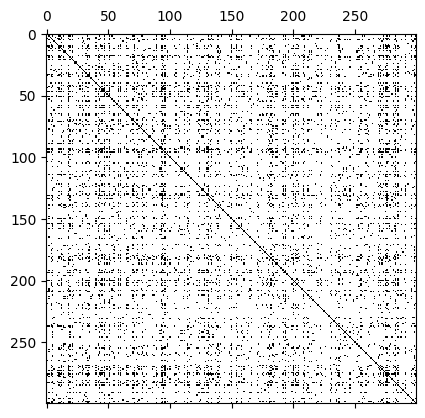

In [13]:
dati = loadmat('testI.mat')
A=dati["A"]
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

m,n = A.shape
size = m * n

# verifico condizioni matrice
print(f"({m}, {n})")
print("matrice quadrata:", np.all(A.T == A))
print("grandi dimensioni:", m >= 300)
print("sparsa:", np.count_nonzero(A) / size < 0.33)
print("definita positiva:", np.all(npl.eigvals(A) > 0))

plt.spy(A)

> data una matrice simmetrica e definita positiva, risolvere il sistema Ax = b trovando x* tale che annulla il residuo sistema r = Ax - b equivale a minimizzare la funzione quadrataica F(x) = 1/2 <Ax, x> - <b, x> (dimostrabile calcolando il gradiente di F(x))

 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]

In [14]:
def steepestdescent(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]

    # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0

    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)

    # utilizzare il metodo del gradiente per trovare la soluzione
    while it < itmax and errore >= tol:
        it=it+1
        Ap= A @ p

        alpha = - (r.T @ p) / (p.T @ Ap)
        x = x + alpha * p

        vec_sol.append(x)
        r = r + alpha * Ap
        p = -r

        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)

    return x,vet_r,vec_sol,it

In [15]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]

   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0

    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)

    # utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it < itmax:
        it=it+1
        Ap = A @ p
        alpha = (r.T @ r) / (p.T @ Ap)

        x = x + alpha * p
        vec_sol.append(x)

        rtr_old = r.T @ r
        r = r+alpha*Ap
        gamma = (r.T @ r) / rtr_old

        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r + gamma * p

    return x,vet_r,vec_sol,it

iterazioni steepestdesc: 4000
iterazioni conjugate: 327


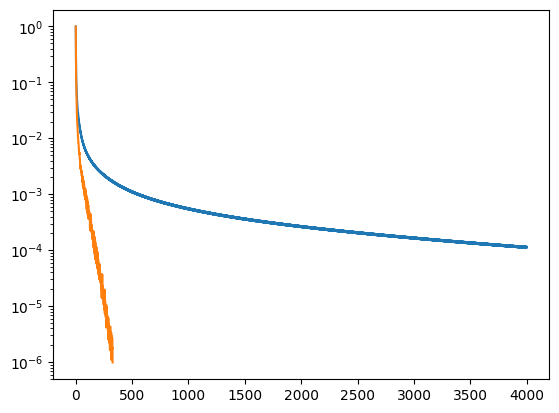

In [17]:
toll=1e-6
maxit=4000
x0 = np.zeros_like(b)

x_steep, vet_err_steep, vec_sol_steep, it_steep = steepestdescent(A, b, x0, maxit, toll)
x_conj, vet_err_conj, vec_sol_conj, it_conj = conjugate_gradient(A, b, x0, maxit, toll)

print("iterazioni steepestdesc:", it_steep)
print("iterazioni conjugate:", it_conj)

plt.semilogy(range(it_steep+1), vet_err_steep, range(it_conj+1), vet_err_conj)


 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

In [21]:
print("condizionamento A:", npl.cond(A))
print("mal condizionata:", np.log10(npl.cond(A)) > 3)

condizionamento A: 9999.999999993037
mal condizionata: True


> l'indice di condizionamento della matrice influisce sulla convergenza dei due metodi, in particolare per il metodo dello steepest descent, la velocità di convergenza è data dal rapporto K(A) - 1 / K(A) + 1, tanto più K(A) è grande, tanto più questo rapporto tende ad uno e quindi tanto più è lenta la convergenza del metodo. per il metodo del gradient descent invece, la velocità di convergenza è data dal rapporto sqrt(K(A)) - 1 / sqrt(K(A)) + 1, quindi l'indice di condizionamento è "smorzato" dalla radice e ha convergenza più veloce


 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

iterazioni steepestdesc: 136
iterazioni conjugate: 31


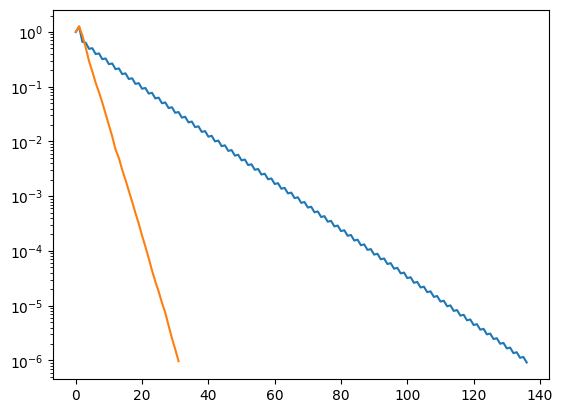

In [23]:
A1=A+np.eye(A.shape[0])*0.05
b1 = np.full_like(b, 1)

toll=1e-6
maxit=4000
x0 = np.zeros_like(b)

x_steep, vet_err_steep, vec_sol_steep, it_steep = steepestdescent(A1, b1, x0, maxit, toll)
x_conj, vet_err_conj, vec_sol_conj, it_conj = conjugate_gradient(A1, b1, x0, maxit, toll)

print("iterazioni steepestdesc:", it_steep)
print("iterazioni conjugate:", it_conj)

plt.semilogy(range(it_steep+1), vet_err_steep, range(it_conj+1), vet_err_conj)

In [24]:
print("condizionamento A1:", npl.cond(A1))
print("mal condizionata:", np.log10(npl.cond(A1)) > 3)

condizionamento A1: 20.958083832335333
mal condizionata: False


> la matrica A1 a differenza della matrice A è ben condizionata, perciò i due metodi convergono più velocemente, specialmente il metodo dello steepest descent per le motivazioni discusse precedentemente

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

In [66]:
x = np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y = np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59])
xx = np.linspace(1, 3, 200)

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [48]:
def eqnorm(A,b):
#Risolve un sistema sovradeterminato con il metodo delle equazioni normali
    G= A.T @ A
    f= A.T @ b

    L= npl.cholesky(G)
    U=L.T

    z, flag = SolveTriangular.Lsolve(L, f)
    if flag != 0:
        raise "Failed to Lsolve"
    x, flag = SolveTriangular.Usolve(U, z)
    if flag != 0:
        raise "Failed to Usolve"

    return x

In [68]:
def LinearP(x, y, xx):
    A = np.vander(x, 2, increasing=True)
    alpha = eqnorm(A, y)
    return np.polyval(np.flip(alpha), xx)

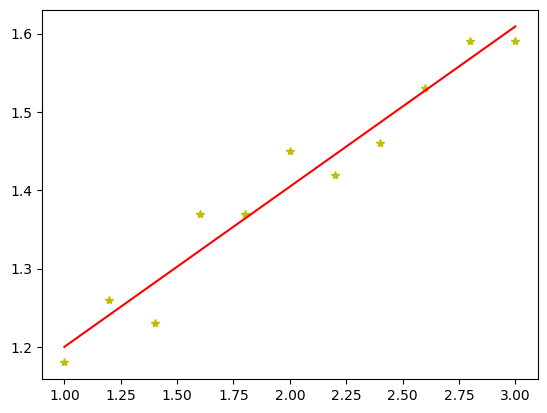

In [69]:
yy = LinearP(x, y, xx)
plt.plot(x, y, 'y*', xx, yy, 'r-')

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

In [64]:
def plagr(xnodi,j):
   """
   Restituisce i coefficienti del j-esimo pol di
   Lagrange associato ai punti del vettore xnodi
   """
   xzeri=np.zeros_like(xnodi)
   n=xnodi.size
   if j==0:
      xzeri=xnodi[1:n]
   else:
      xzeri=np.append(xnodi[:j], xnodi[j+1:])

   num = np.poly(xzeri)
   den = np.polyval(num, xnodi[j])

   p=num/den
   return p

In [65]:
def InterpL(x, y, xx):
   """"
      %funzione che determina in un insieme di punti il valore del polinomio
      %interpolante ottenuto dalla formula di Lagrange.
      % DATI INPUT
      %  x  vettore con i nodi dell'interpolazione
      %  f  vettore con i valori dei nodi 
      %  xx vettore con i punti in cui si vuole calcolare il polinomio
      % DATI OUTPUT
      %  y vettore contenente i valori assunti dal polinomio interpolante
      %
   """
   n=x.size
   m=xx.size
   L=np.zeros((m,n))

   for j in range(n):
      p = plagr(x, j)
      L[:,j]= np.polyval(p, xx)

   return L@y

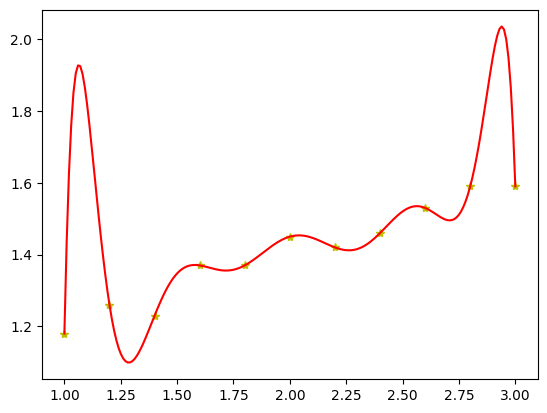

In [67]:
yy = InterpL(x, y, xx)
plt.plot(x, y, 'y*', xx, yy, 'r-')

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

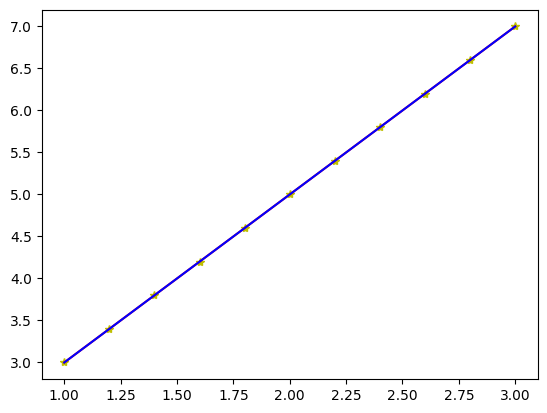

In [71]:
y_cap = [2*xi+1 for xi in x]
yy_linear = LinearP(x, y_cap, xx)
yy_interpl = InterpL(x, y_cap, xx)
plt.plot(x, y_cap, 'y*', xx, yy_linear, 'r-', xx, yy_interpl, 'b-')

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $(x_i,y_i)$, i=1,11 ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

> Le cose particolari da notare sono:
> 1. Le fitte oscillazioni del polinomio interpolante negli estremi dell'intervallo, questa è una caratteristica classica del polinomio interpolante quando si scelgono delle coordinate equispaziate, sarebbe meglio utilizzare gli zeri della funzione di chebichev per evitare questo comportamento
> 2. L'errore del polinomio interpolante per le coppie (x, y_cap) è 0 perchè la funzione descritta ha derivata n+1-esima nulla
> 3. Per le coppie (x, y_cap) il polinomio di approssimazione lineare ha errore nullo perché la funzione descritta è lineare

                                                                        Totale 14 punti

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]
